# Skaters (Season 2024/25) - Hits

### Import libraries

In [1]:
import sys
import os
import pandas as pd

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
from utils import data_cleaning
from utils import distribution_analysis as da

### Import the dataset

In [4]:
#skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
skaters_df = "../data/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


### Read the data

In [5]:
data_cleaning.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [6]:
data_cleaning.save_column_names(df)

Saved: names_columns.txt


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


### Data cleaning

In [8]:
# Missing values?
data_cleaning.report_nan(df)

No missing values found.


In [9]:
df = data_cleaning.drop_duplicate_columns(df, ["faceoffsWon", "I_F_faceOffsWon"])
df = data_cleaning.drop_duplicate_columns(df, [ "penalityMinutes", "I_F_penalityMinutes"])

Dropped columns: ['I_F_faceOffsWon']
Number of features: 153
Dropped columns: ['I_F_penalityMinutes']
Number of features: 152


### Variables and Filter

In [10]:
situation = "all"
feature = "I_F_hits"
min_games_played = 20
name_player="Auston Matthews"

In [11]:
df_hits = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]

### Summary Statistics

In [12]:
answer = df[df["situation"] == "all"].loc[lambda d: d[feature].idxmax()]
print(f"Player with most hits: {answer["name"]} with {int(answer[feature])} hits.")

Player with most hits: Kiefer Sherwood with 462 hits.


### Frequency Tables

Mean: 78.077
Variance: 3317.587
Standard deviation: 57.557
Mode: [19. 26. 50.]


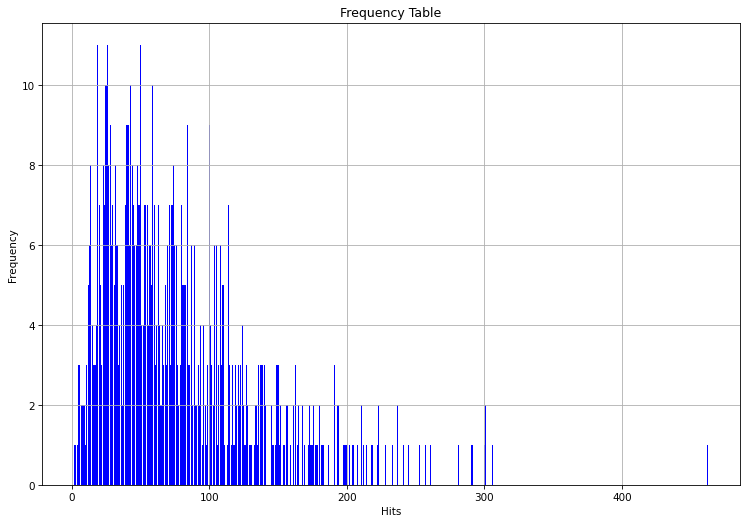

In [13]:
da.plot_ftab(df_hits, feature, xlabel="Hits")

Cohen's effect size: 0.26


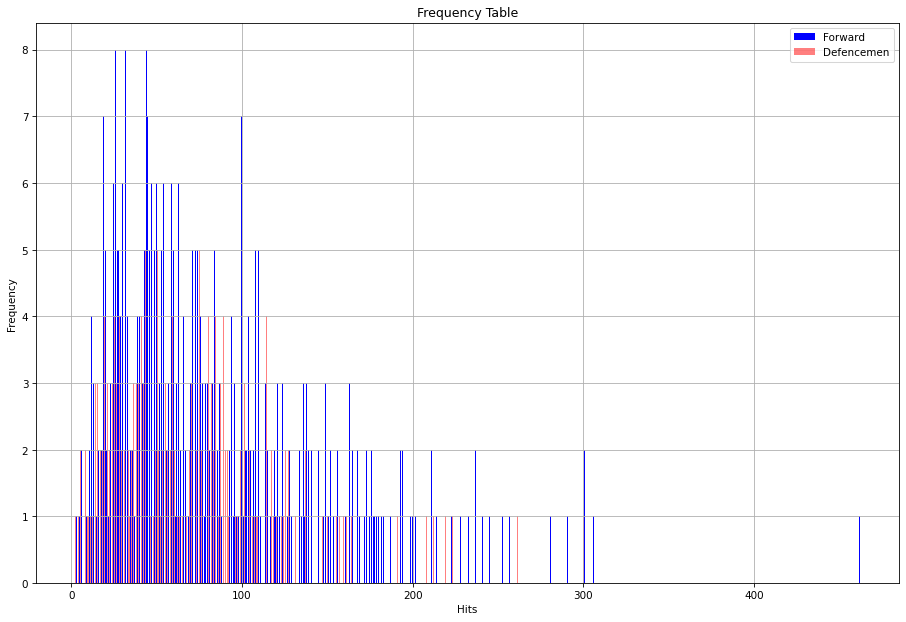

In [14]:
df1 = df_hits[df_hits["position"]!="D"]
df2 = df_hits[df_hits["position"]=="D"]

da.plot_two_ftabs(df1, df2, feature, name1="Forward", name2="Defencemen", xlabel="Hits")

### Probability Mass Function

Actual PMF: 
Mean: 78.077
Variance: 3312.83
Standard deviation: 57.557
Mode: 19.0
Skewness: 1.586

Observed PMF: 
Mean: 120.508
Variance: 5385.63
Standard deviation: 73.387
Mode: 100.0
Skewness: 1.343


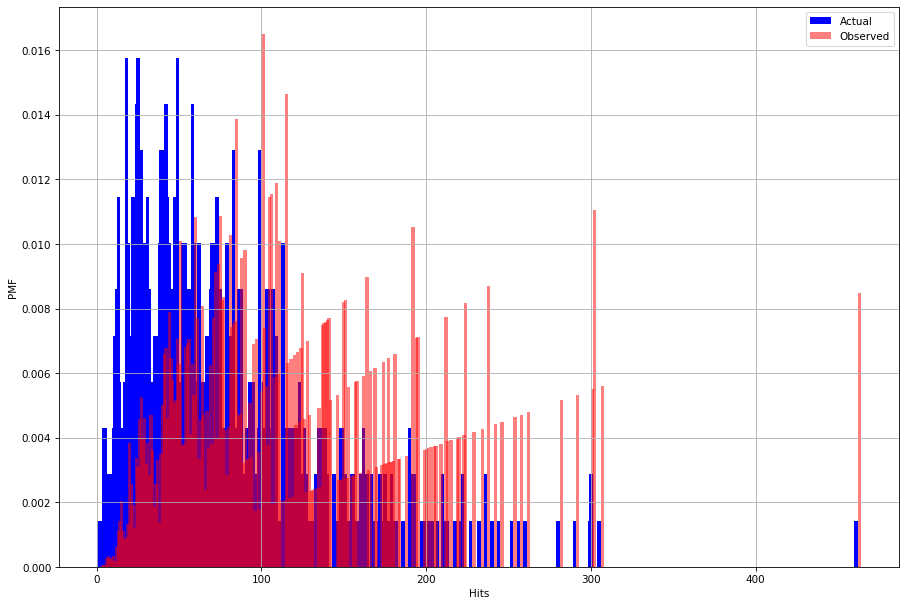

In [15]:
da.plot_pmf(df_hits, feature, xlabel="Hits")

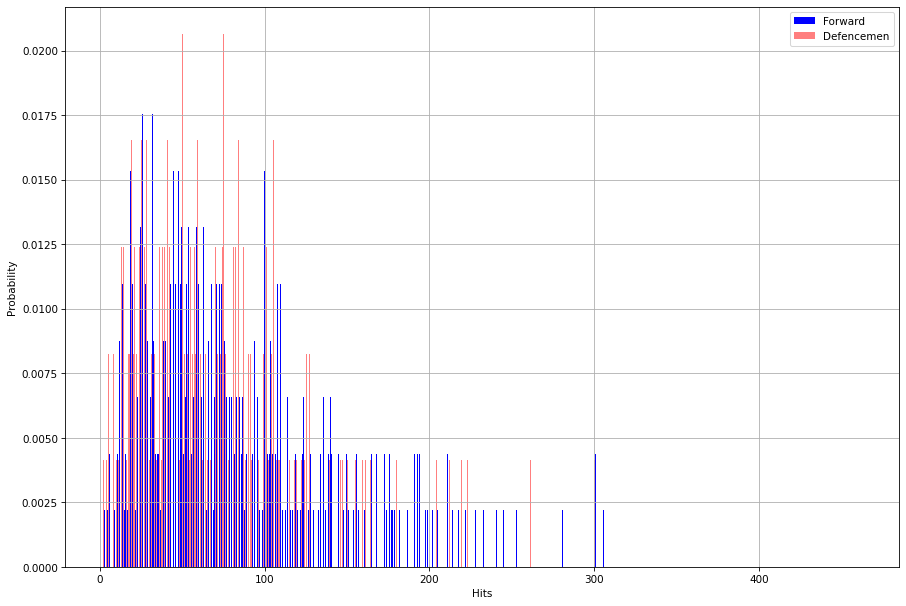

In [16]:
df1 = df_hits[df_hits["position"]!="D"]
df2 = df_hits[df_hits["position"]=="D"]

da.plot_two_pmfs(df1, df2, feature, name1="Forward", name2="Defencemen", xlabel="Hits")

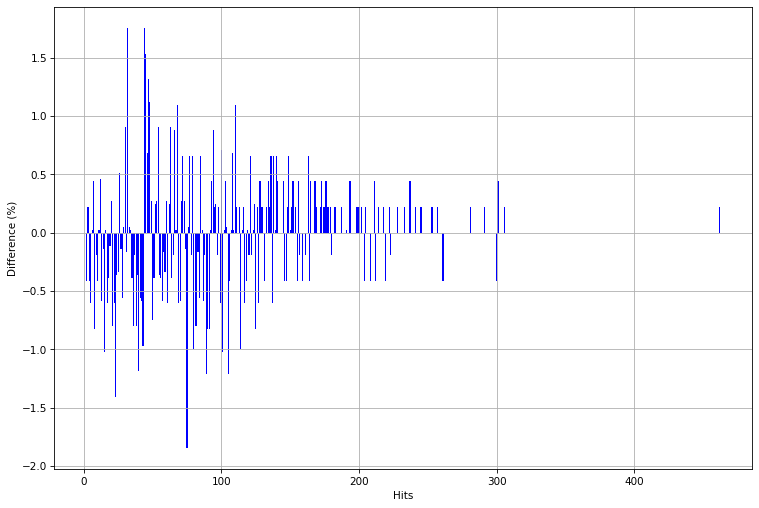

In [17]:
df1 = df_hits[df_hits["position"]!="D"]
df2 = df_hits[df_hits["position"]=="D"]

da.plot_diff_pmfs(df1, df2, feature, name1="Forward", name2="Defencemen", xlabel="Hits")

### Cumulative Distribution Function

Auston Matthews - Percentile rank: 34.10
Median: 63.00
Interquartile range: 69.00
Quartile skewness: 0.22


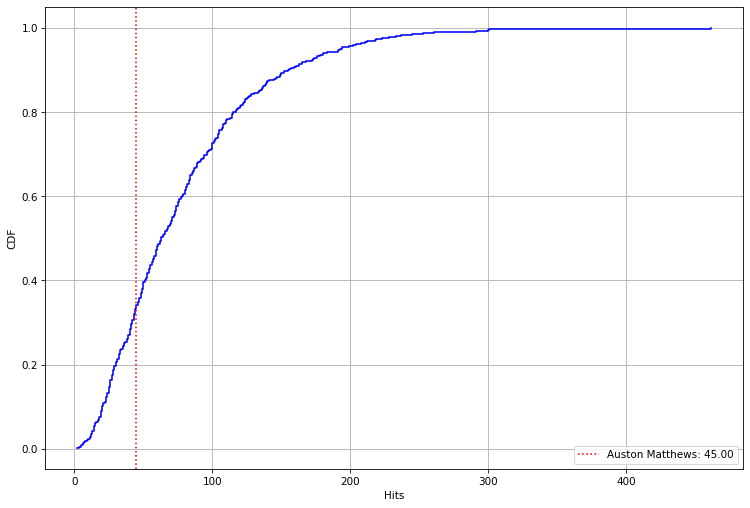

In [18]:
vals = df_hits[feature].values
ref = df_hits[df_hits["name"]==name_player][feature].values[0]

da.print_percentile_rank(ref, vals, label=name_player)
da.plot_cdf(ref, vals, label=name_player, xlabel="Hits")

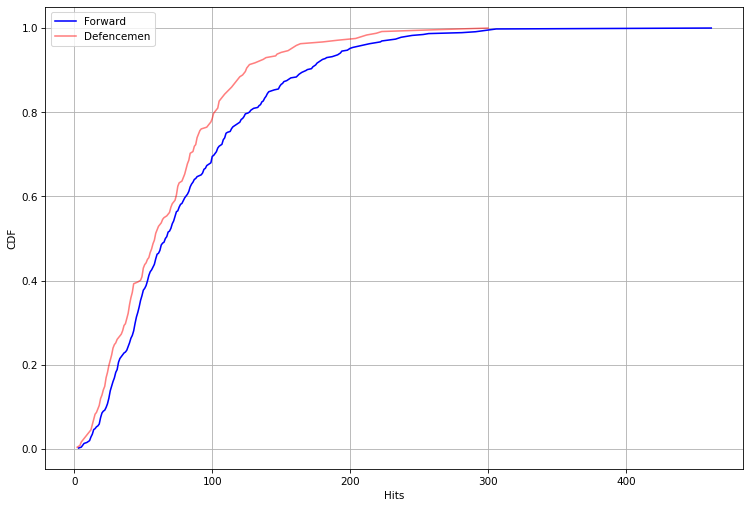

In [19]:
vals1 = df_hits[df_hits["position"]!="D"][feature].values
vals2 = df_hits[df_hits["position"]=="D"][feature].values

da.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Hits")

### Modeling Distributions